# Project "***Movie Recommender***"

## Overview

The project is focused on developing algorithms to recommend movies in a non personalized or general and personalized recommendations to users based on content.

## Objectives

+ Develop an algorithm to make recommendations of movies based on positive reviews and amount of votes.

+ Create a recommendation system of personalized movies on current trendings, popularity and genres, to brand new users or without history using the cosine similarity.

+ Improve the user experience through proposing movies that are very probable to match the preferences.

## Scope

+ *Verify and process the data*: the collected data must pass through a processing to eliminate null and duplicated values and future engineering.

+ *Data Analysis*: a deep analysis of the data will generate impactful insights that
identify trendings.

+ *Creation of algorithms*: there will be some recommendation systems such as non personalized, based on user content and collaborative filtering.

+ *Deployment*: this will be using FastAPI.

## Benefits

+ *Increase the user retention*

+ *Increase of the engagement*

+ *Discovery of new contents*

## Success indicators

+ *Accomplishment of the requirements*: that the non personalized recommendation system
recomends the top 10 most popular movies and for the personalized recommendation based on content 5 movies must be shown.

+ *API efficiency*: that the API passes the Postman test.

+ *Accomplishment of the deadline*: complete the development and deployment of the project on the established date.


## 1. Preprocessing

### Libraries

In [1]:
# mathematical computing
import pandas as pd
import numpy as np

# sklearn
import sklearn as sk

# API
##from fastapi import FastAPI as API
##from routes import router

# visualization
import matplotlib as mpt

# global variables
global df_movies, df_ratings, df_final

### 1.1 Data Cleaning

In [2]:
df_movies = pd.read_csv('/Users/alexangelbracho/Desktop/GitHub_projects/Movie Recommender/Movie-Recommender/movies.csv')
df_movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
df_movies.describe

<bound method NDFrame.describe of       movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|Fantasy  
2                                  Comedy|Romance  
3                            Comedy|D

In [4]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [5]:
# function: preprocessing

def preprocessing(df: pd.DataFrame):
    '''It eliminates the null and duplicated values from the dataframe. Additionally,
    it transforms the columns of object type into string type.'''
    df = df.drop_duplicates()
    df = df.dropna()
    df = df.convert_dtypes()
    df['content'] = df['genres'].str.replace('|',' ')
    df['genre_set'] = df['genres'].str.replace('|',',')
    #df['timestamp'] = pd.to_datetime(df['timestamp'])

    return df

In [6]:
df_movies = preprocessing(df_movies)

In [7]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   movieId    9742 non-null   Int64 
 1   title      9742 non-null   string
 2   genres     9742 non-null   string
 3   content    9742 non-null   string
 4   genre_set  9742 non-null   string
dtypes: Int64(1), string(4)
memory usage: 390.2 KB


In [8]:
df_movies.head(5) 

,movieId,title,genres,content,genre_set
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy,"Adventure,Animation,Children,Comedy,Fantasy"
1,2,Jumanji (1995),Adventure|Children|Fantasy,Adventure Children Fantasy,"Adventure,Children,Fantasy"
2,3,Grumpier Old Men (1995),Comedy|Romance,Comedy Romance,"Comedy,Romance"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Comedy Drama Romance,"Comedy,Drama,Romance"
4,5,Father of the Bride Part II (1995),Comedy,Comedy,Comedy


In [9]:
df_ratings = pd.read_csv('/Users/alexangelbracho/Desktop/GitHub_projects/Movie Recommender/Movie-Recommender/ratings.csv')

In [10]:
df_ratings['timestamp'] = pd.to_datetime(df_ratings['timestamp'])

In [11]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   userId     100836 non-null  int64         
 1   movieId    100836 non-null  int64         
 2   rating     100836 non-null  float64       
 3   timestamp  100836 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.1 MB


In [12]:
#df_ratings = preprocessing(df_movies)

In [13]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   userId     100836 non-null  int64         
 1   movieId    100836 non-null  int64         
 2   rating     100836 non-null  float64       
 3   timestamp  100836 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.1 MB


In [14]:
df_ratings.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,1970-01-01 00:00:00.964982703
1,1,3,4.0,1970-01-01 00:00:00.964981247
2,1,6,4.0,1970-01-01 00:00:00.964982224
3,1,47,5.0,1970-01-01 00:00:00.964983815
4,1,50,5.0,1970-01-01 00:00:00.964982931


In [15]:
df_ratings.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,1970-01-01 00:00:00.964982703
1,1,3,4.0,1970-01-01 00:00:00.964981247
2,1,6,4.0,1970-01-01 00:00:00.964982224
3,1,47,5.0,1970-01-01 00:00:00.964983815
4,1,50,5.0,1970-01-01 00:00:00.964982931


In [16]:
df_movies.head(2)

,movieId,title,genres,content,genre_set
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy,"Adventure,Animation,Children,Comedy,Fantasy"
1,2,Jumanji (1995),Adventure|Children|Fantasy,Adventure Children Fantasy,"Adventure,Children,Fantasy"


In [17]:
df_final = pd.merge(df_movies,df_ratings,on='movieId',how='inner')

In [18]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   movieId    100836 non-null  Int64         
 1   title      100836 non-null  string        
 2   genres     100836 non-null  string        
 3   content    100836 non-null  string        
 4   genre_set  100836 non-null  string        
 5   userId     100836 non-null  int64         
 6   rating     100836 non-null  float64       
 7   timestamp  100836 non-null  datetime64[ns]
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), string(4)
memory usage: 6.3 MB


In [19]:
df_final.drop_duplicates()

,movieId,title,genres,content,genre_set,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy,"Adventure,Animation,Children,Comedy,Fantasy",1,4.0,1970-01-01 00:00:00.964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy,"Adventure,Animation,Children,Comedy,Fantasy",5,4.0,1970-01-01 00:00:00.847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy,"Adventure,Animation,Children,Comedy,Fantasy",7,4.5,1970-01-01 00:00:01.106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy,"Adventure,Animation,Children,Comedy,Fantasy",15,2.5,1970-01-01 00:00:01.510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy,"Adventure,Animation,Children,Comedy,Fantasy",17,4.5,1970-01-01 00:00:01.305696483
...,...,...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,Action Animation Comedy Fantasy,"Action,Animation,Comedy,Fantasy",184,4.0,1970-01-01 00:00:01.537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,Animation Comedy Fantasy,"Animation,Comedy,Fantasy",184,3.5,1970-01-01 00:00:01.537109545
100833,193585,Flint (2017),Drama,Drama,Drama,184,3.5,1970-01-01 00:00:01.537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,Action Animation,"Action,Animation",184,3.5,1970-01-01 00:00:01.537110021


In [20]:
df_final.dropna()

,movieId,title,genres,content,genre_set,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy,"Adventure,Animation,Children,Comedy,Fantasy",1,4.0,1970-01-01 00:00:00.964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy,"Adventure,Animation,Children,Comedy,Fantasy",5,4.0,1970-01-01 00:00:00.847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy,"Adventure,Animation,Children,Comedy,Fantasy",7,4.5,1970-01-01 00:00:01.106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy,"Adventure,Animation,Children,Comedy,Fantasy",15,2.5,1970-01-01 00:00:01.510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy,"Adventure,Animation,Children,Comedy,Fantasy",17,4.5,1970-01-01 00:00:01.305696483
...,...,...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,Action Animation Comedy Fantasy,"Action,Animation,Comedy,Fantasy",184,4.0,1970-01-01 00:00:01.537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,Animation Comedy Fantasy,"Animation,Comedy,Fantasy",184,3.5,1970-01-01 00:00:01.537109545
100833,193585,Flint (2017),Drama,Drama,Drama,184,3.5,1970-01-01 00:00:01.537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,Action Animation,"Action,Animation",184,3.5,1970-01-01 00:00:01.537110021


In [21]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   movieId    100836 non-null  Int64         
 1   title      100836 non-null  string        
 2   genres     100836 non-null  string        
 3   content    100836 non-null  string        
 4   genre_set  100836 non-null  string        
 5   userId     100836 non-null  int64         
 6   rating     100836 non-null  float64       
 7   timestamp  100836 non-null  datetime64[ns]
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), string(4)
memory usage: 6.3 MB


In [22]:
df_final.head(5)

,movieId,title,genres,content,genre_set,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy,"Adventure,Animation,Children,Comedy,Fantasy",1,4.0,1970-01-01 00:00:00.964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy,"Adventure,Animation,Children,Comedy,Fantasy",5,4.0,1970-01-01 00:00:00.847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy,"Adventure,Animation,Children,Comedy,Fantasy",7,4.5,1970-01-01 00:00:01.106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy,"Adventure,Animation,Children,Comedy,Fantasy",15,2.5,1970-01-01 00:00:01.510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy,"Adventure,Animation,Children,Comedy,Fantasy",17,4.5,1970-01-01 00:00:01.305696483


## 2. Exploratory Data Analysis (EDA)

array([[<Axes: title={'center': 'movieId'}>]], dtype=object)

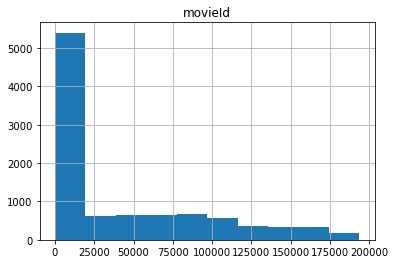

In [23]:
df_movies.hist()

<Axes: >

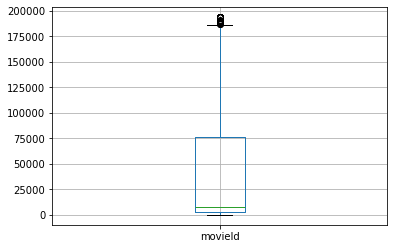

In [24]:
df_movies.boxplot()

array([[<Axes: title={'center': 'userId'}>,
        <Axes: title={'center': 'movieId'}>],
       [<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'timestamp'}>]], dtype=object)

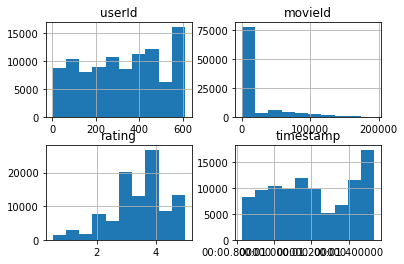

In [25]:
df_ratings.hist()

<Axes: >

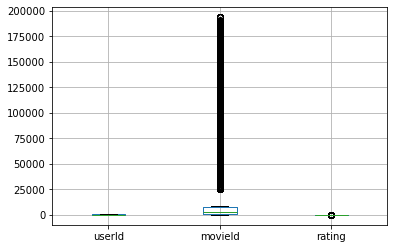

In [26]:
df_ratings.boxplot()

array([[<Axes: title={'center': 'movieId'}>,
        <Axes: title={'center': 'userId'}>],
       [<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'timestamp'}>]], dtype=object)

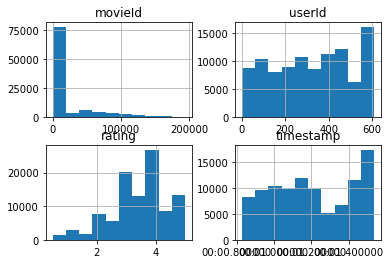

In [27]:
df_final.hist()

<Axes: >

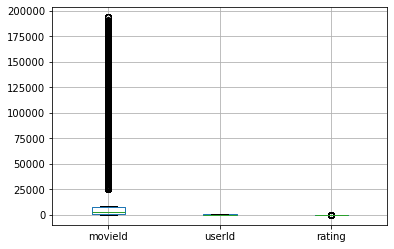

In [28]:
df_final.boxplot()

#### There are no outliers in any of the graphs.

## 3. Non personalized recommendation system

In [29]:
# function: non personalized

def non_personalized():
    global df_movies, df_final, df_ratings

### 3.1 Top 10 (most popular movies)

In [66]:
df_final.head(2)

,movieId,title,genres,content,genre_set,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy,"Adventure,Animation,Children,Comedy,Fantasy",1,4.0,1970-01-01 00:00:00.964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy,"Adventure,Animation,Children,Comedy,Fantasy",5,4.0,1970-01-01 00:00:00.847434962


In [67]:
df_final.groupby('title').value_counts().sort_values(ascending=True)

title                                      movieId  genres                     content                    genre_set                  userId  rating  timestamp                    
'71 (2014)                                 117867   Action|Drama|Thriller|War  Action Drama Thriller War  Action,Drama,Thriller,War  610     4.0     1970-01-01 00:00:01.493849881    1
Payback (1999)                             2490     Action|Thriller            Action Thriller            Action,Thriller            42      4.0     1970-01-01 00:00:00.996219699    1
                                                                                                                                     33      3.0     1970-01-01 00:00:00.939654747    1
                                                                                                                                     28      4.5     1970-01-01 00:00:01.234516086    1
                                                                                     

In [68]:
df_final.groupby('movieId')['userId'].sum().sort_values(ascending=False)

movieId
356       101385
318        95829
296        90621
593        85535
2571       85236
           ...  
6835           3
5746           3
7899           3
131724         2
1473           1
Name: userId, Length: 9724, dtype: int64

In [69]:
x = df_final.groupby('movieId')['rating'].mean().sort_values(ascending=False)

In [76]:
# the 10 most popular movies 

df_popular_movies = df_final[['title']].value_counts()

In [77]:
type(df_popular_movies)

pandas.core.series.Series

In [78]:
df_popular_movies.head(5)

title                           
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: count, dtype: int64

In [79]:
df_popular_movies = pd.DataFrame(df_popular_movies)

In [80]:
df_popular_movies.head(5)

,count
title,
Forrest Gump (1994),329
"Shawshank Redemption, The (1994)",317
Pulp Fiction (1994),307
"Silence of the Lambs, The (1991)",279
"Matrix, The (1999)",278


In [88]:
item_counts = df_final['title'].value_counts()

In [100]:
print('The top 10 most popular movies are:')
print('-----------------------------------')
item_counts.sort_values(ascending=False).head(10)

The top 10 most popular movies are:
-----------------------------------


title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: count, dtype: Int64

In [104]:
popular_items = item_counts[item_counts>200].index

In [105]:
type(popular_items)

pandas.core.indexes.base.Index

In [107]:
df_popular = df_final[df_final['title'].isin(popular_items)]

In [110]:
df_popular.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4338 entries, 0 to 50052
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   movieId    4338 non-null   Int64         
 1   title      4338 non-null   string        
 2   genres     4338 non-null   string        
 3   content    4338 non-null   string        
 4   genre_set  4338 non-null   string        
 5   userId     4338 non-null   int64         
 6   rating     4338 non-null   float64       
 7   timestamp  4338 non-null   datetime64[ns]
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), string(4)
memory usage: 309.3 KB


In [155]:
average_values = df_popular.groupby('title')['rating'].mean().round(2)

In [115]:
type(average_values)

pandas.core.series.Series

In [156]:
average_values

title
American Beauty (1999)                                   4.06
Apollo 13 (1995)                                         3.85
Braveheart (1995)                                        4.03
Fight Club (1999)                                        4.27
Forrest Gump (1994)                                      4.16
Independence Day (a.k.a. ID4) (1996)                     3.45
Jurassic Park (1993)                                     3.75
Matrix, The (1999)                                       4.19
Pulp Fiction (1994)                                      4.20
Schindler's List (1993)                                  4.22
Seven (a.k.a. Se7en) (1995)                              3.98
Shawshank Redemption, The (1994)                         4.43
Silence of the Lambs, The (1991)                         4.16
Star Wars: Episode IV - A New Hope (1977)                4.23
Star Wars: Episode V - The Empire Strikes Back (1980)    4.22
Terminator 2: Judgment Day (1991)                        3.97
To

In [160]:
mean_rating_total = round(df_popular['rating'].mean(),2)

In [161]:
mean_rating_total

4.09

In [ ]:
threshold_votes = 270

In [ ]:
weighted_rating = (vote_count/(vote_count + threshold_votes )*R) + (threshold_votes /(threshold_votes  + vote_count)*mean_rating_total)

In [157]:
df_stats = pd.DataFrame({
                            'mean_rating' : average_values,
                            'vote_count':df_popular['title'].value_counts()
})

In [126]:
type(df_stats)

pandas.core.frame.DataFrame

In [158]:
df_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, American Beauty (1999) to Usual Suspects, The (1995)
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mean_rating  18 non-null     float64
 1   vote_count   18 non-null     Int64  
dtypes: Int64(1), float64(1)
memory usage: 1006.0 bytes


In [159]:
df_stats.sort_values(by='mean_rating',ascending=False).head(10)

,mean_rating,vote_count
title,,
"Shawshank Redemption, The (1994)",4.43,317
Fight Club (1999),4.27,218
"Usual Suspects, The (1995)",4.24,204
Star Wars: Episode IV - A New Hope (1977),4.23,251
Star Wars: Episode V - The Empire Strikes Back (1980),4.22,211
Schindler's List (1993),4.22,220
Pulp Fiction (1994),4.20,307
"Matrix, The (1999)",4.19,278
"Silence of the Lambs, The (1991)",4.16,279


In [81]:
df_popular_movies.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9719 entries, ('Forrest Gump (1994)',) to ('À nous la liberté (Freedom for Us) (1931)',)
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   9719 non-null   int64
dtypes: int64(1)
memory usage: 428.9+ KB


In [ ]:
def recommendation_popular(df : pd.DataFrame):
    global df_final,df_movies,df_ratings
    df_popular_movies = df[['title']].value_counts()
